基于AP聚类算法的量化选股策略研究

复刻《基于AP聚类算法的量化选股策略研究》，分为数据准备、因子筛选、聚类分析、机器学习预测、投资组合构建和结果评估六大阶段。

1. 数据准备
	1.	确定股票池：选择沪深300成分股作为研究对象，获取涵盖所有样本股票的基础数据。
	2.	因子收集：
	•	收集基本面因子，如市盈率（PE）、市净率（PB）、股息率等。
	•	收集技术面因子，如动量指标、波动率指标等。
	•	收集市场情绪因子，如换手率等。
	•	最终构建包含53个初始因子的因子库。
	3.	数据预处理：
	•	清洗数据：处理缺失值、异常值。
	•	标准化：对所有因子进行归一化处理，使其具有相同的量纲。
	•	时间序列转换：生成因子的多期滚动窗口值，构建因子的时间序列特征。

2. 因子筛选
	1.	因子有效性检验：
	•	相关性分析：计算因子之间的相关系数矩阵，剔除冗余因子。
	•	回归分析：利用多元线性回归分析因子对股票收益的解释能力。
	•	信息比率（IR）评估：通过因子的IR值筛选有效因子。
	2.	生成复合因子：
	•	综合有效因子，最大化信息比率（IR）。
	•	计算每个因子的权重，生成复合因子序列。

3. 聚类分析
	1.	动态时间规整（DTW）度量：
	•	利用DTW算法度量股票复合因子序列之间的相似性，解决时间序列对齐和延迟问题。
	•	构建相似性矩阵，作为后续聚类的输入。
	2.	AP聚类算法：
	•	使用AP（Affinity Propagation）聚类算法对股票进行分组。
	•	聚类参数调整：优化偏好参数和阻尼因子。
	•	聚类结果评估：计算轮廓系数和CH指标，选择最佳聚类数目。
	3.	类别分布分析：
	•	分析各类别股票的特征，确认聚类结果的合理性。

4. 机器学习预测
	1.	模型选择：
	•	使用支持向量机（SVM）、随机森林（Random Forest）、梯度提升树（XGBoost）三种机器学习算法。
	2.	因子与目标构建：
	•	利用本期的复合因子数据作为输入，预测下期股票收益率。
	•	定义目标变量：根据股票收益率上涨概率构建二分类目标（上涨/不涨）。
	3.	参数优化：
	•	使用网格搜索或贝叶斯优化寻找最佳超参数组合（如学习率、树深、核函数等）。
	4.	模型训练：
	•	在每个聚类类别中训练独立的模型。
	•	输出每只股票的预测上涨概率。

5. 投资组合构建
	1.	选股策略：
	•	对每个聚类类别中，选择预测上涨概率最高的股票。
	•	构建三个独立的投资组合，每个组合对应一种机器学习模型。
	2.	权重分配：
	•	利用Markowitz均值-方差模型分配权重，优化组合收益和风险。
	•	分别采用等权重和风险最小化两种加权方式，生成不同的投资组合。

6. 结果评估
	1.	投资组合评价指标：
	•	收益性：年度化收益率、超额收益率。
	•	风险性：波动率、最大回撤。
	•	综合性：夏普比率、信息比率。
	2.	结果对比：
	•	比较三种机器学习模型下的投资组合表现。
	•	分析不同加权方式的收益和风险差异。
	•	验证基于聚类选股策略的有效性。
	3.	实证结论：
	•	总结不同策略下的最佳配置。
	•	归纳基于AP聚类和机器学习选股策略的优势及适用性。

7. 报告撰写
	1.	结果展示：
	•	可视化每种策略下的收益曲线和风险评估指标。
	•	绘制聚类结果的分布图，展示股票类别特征。
	•	总结回测结果与市场基准的对比表现。
	2.	结论分析：
	•	结合实证研究的结果，分析该方法在风险控制和超额收益方面的优劣。
	•	提出策略改进建议和未来研究方向。

In [1]:
# %%
import pandas as pd

# %%
file_path ='/Users/a1/Desktop/shanghai_stock_data_002.csv'  # 修改为正确的文件路径

try:
    merged_data_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [2]:
merged_data_001

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,book_value,book_to_price_ratio,liquidity,eps,earnings_yield,sales_growth,growth,total_debt,total_assets,leverage
0,600000.SH,20240927,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,36.859667,0.000007,0.101317,0.504113,0.051075,-0.514387,-0.514387,-307.419622,-364.832706,0.842632
1,600000.SH,20240926,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,63.198520,0.000007,0.101626,-1.866847,-0.189720,1.086731,1.086731,-71.829015,-110.471989,0.650201
2,600000.SH,20240925,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,91.694942,0.000008,0.105374,-8.441166,-0.889480,0.164191,0.164191,-564.105146,4037.336523,-0.139722
3,600000.SH,20240924,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,109.858771,0.000014,0.110011,0.425035,0.046758,-0.332094,-0.332094,-1486.273907,-643.219087,2.310681
4,600000.SH,20240923,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,-133.236020,-0.000051,0.115875,4.139365,0.479648,-0.742193,-0.742193,322.417673,-4701.799805,-0.068573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,689009.SH,20240902,45.48,46.40,45.00,45.14,44.70,0.44,0.9843,104998.02,...,54.577840,0.000012,0.022153,1.159968,0.025697,-0.272862,-0.272862,-161.290433,-576.525839,0.279763
49713,689009.SH,20240830,47.88,49.00,44.44,44.70,48.02,-3.32,-6.9138,142898.15,...,-123.271178,-0.000019,0.022371,14.173295,0.317076,-1.060399,-1.060399,-950.410104,2947.830919,-0.322410
49714,689009.SH,20240829,46.00,48.28,45.62,48.02,46.10,1.92,4.1649,53024.80,...,120.721413,0.000047,0.020825,4.108913,0.085567,1.167121,1.167121,-1626.828640,1516.456522,-1.072783
49715,689009.SH,20240828,46.45,47.04,45.52,46.10,46.45,-0.35,-0.7535,35325.03,...,17.474440,0.000011,0.021692,4.666269,0.101221,0.876054,0.876054,47.672116,4891.569473,0.009746


In [3]:
print(list(merged_data_001.columns))

['ts_code', 'trade_date', 'open', 'high', 'low', 'close', 'pre_close', 'change', 'pct_chg', 'vol', 'amount', 'new_column', 'market_cap', 'size', 'beta', 'momentum', 'residual_volatility', 'non_linear_size', 'book_value', 'book_to_price_ratio', 'liquidity', 'eps', 'earnings_yield', 'sales_growth', 'growth', 'total_debt', 'total_assets', 'leverage']


In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 加载数据
data = merged_data_001

# 确定初始因子类别
fundamental_factors = ['book_to_price_ratio', 'earnings_yield', 'liquidity', 'leverage']
technical_factors = ['momentum', 'pct_chg', 'beta', 'residual_volatility']
growth_factors = ['sales_growth', 'growth']

all_factors = fundamental_factors + technical_factors + growth_factors

# 确保数据排序
data = data.sort_values(by=['ts_code', 'trade_date'])

# --- 因子筛选 ---

# 1. 计算因子相关性矩阵
correlation_matrix = data[all_factors].corr(method='spearman')

# 显示因子相关性矩阵，填补NaN值以便显示
correlation_matrix = correlation_matrix.fillna(value=np.nan)
print("因子相关性矩阵：")
print(correlation_matrix)

# 2. 剔除冗余因子（相关性高于阈值）
correlation_threshold = 0.8
selected_factors = []

for factor in all_factors:
    if not selected_factors:
        selected_factors.append(factor)
        continue

    # 检查当前因子与已选择因子的最大相关性
    max_corr = max(
        abs(correlation_matrix[factor][selected_factors])
    )

    if max_corr < correlation_threshold:  # 如果最大相关性低于阈值，则保留因子
        selected_factors.append(factor)

print("筛选后的因子：", selected_factors)

# 3. 回归分析，检验因子对未来收益率的解释能力
# 添加未来收益率列
data['future_return'] = data.groupby('ts_code')['pct_chg'].shift(-1)

# 去除空值
data = data.dropna(subset=['future_return'])

# 回归分析
reg_model = LinearRegression()
factor_r2_scores = {}

for factor in selected_factors:
    X = data[[factor]].fillna(0)  # 填充缺失值，避免回归报错
    y = data['future_return']
    reg_model.fit(X, y)
    r2_score = reg_model.score(X, y)  # 用 R² 评估因子的解释力
    factor_r2_scores[factor] = r2_score

# 筛选有效因子
effective_factors = [factor for factor, score in factor_r2_scores.items() if score > 0.02]
print("有效因子：", effective_factors)

# --- 复合因子构建 ---

# 计算因子权重（根据信息比率 IR）
factor_weights = {}
for factor in effective_factors:
    factor_mean = data[factor].mean()
    factor_std = data[factor].std()
    ir = factor_mean / factor_std if factor_std != 0 else 0
    factor_weights[factor] = ir

# 标准化权重
total_weight = sum(factor_weights.values())
for factor in factor_weights:
    factor_weights[factor] /= total_weight

print("因子权重：", factor_weights)

# 计算复合因子
data['composite_factor'] = 0

for factor, weight in factor_weights.items():
    data['composite_factor'] += weight * data[factor]

# 保存数据
data.to_csv('merged_data_001_with_composite_factor.csv', index=False)
print("复合因子构建完成，已保存至 merged_data_001_with_composite_factor.csv")

因子相关性矩阵：
                     book_to_price_ratio  earnings_yield  liquidity  leverage  \
book_to_price_ratio             1.000000       -0.003649   0.002187  0.003523   
earnings_yield                 -0.003649        1.000000  -0.007035  0.004257   
liquidity                       0.002187       -0.007035   1.000000  0.004076   
leverage                        0.003523        0.004257   0.004076  1.000000   
momentum                             NaN             NaN        NaN       NaN   
pct_chg                        -0.009761       -0.000670  -0.001752 -0.004171   
beta                                 NaN             NaN        NaN       NaN   
residual_volatility                  NaN             NaN        NaN       NaN   
sales_growth                    0.006757        0.003347  -0.003999  0.007194   
growth                          0.006757        0.003347  -0.003999  0.007194   

                     momentum   pct_chg  beta  residual_volatility  \
book_to_price_ratio       NaN

/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:15: UserWarning: Glyph 22240 (\N{CJK UNIFIED IDEOGRAPH-56E0}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:15: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:15: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd0000

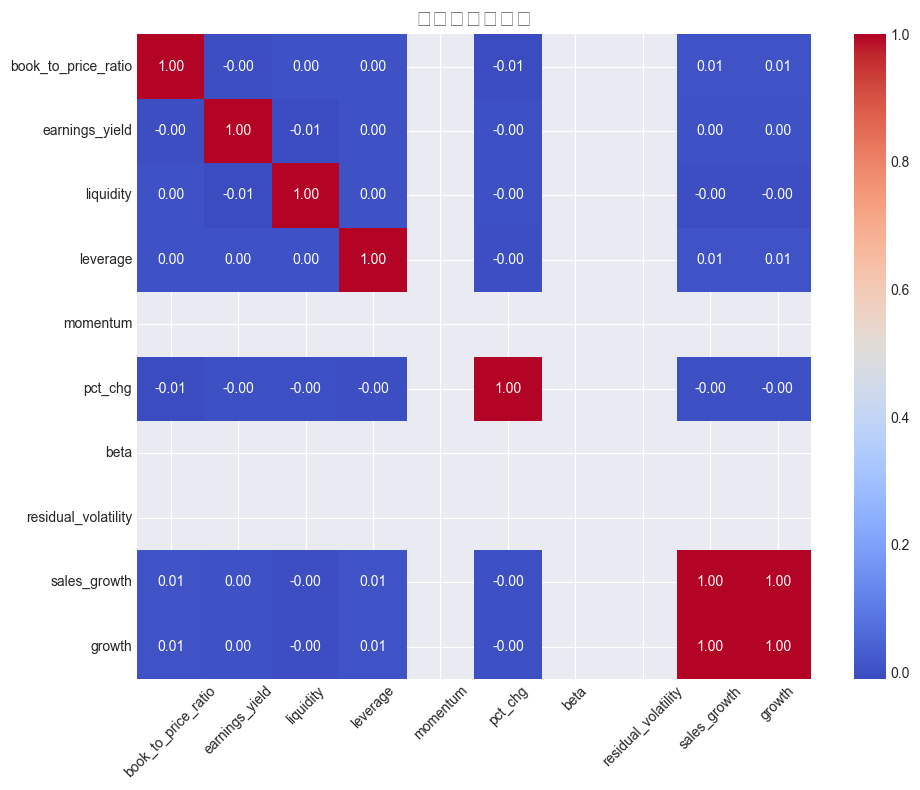

/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:32: UserWarning: Glyph 22240 (\N{CJK UNIFIED IDEOGRAPH-56E0}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:32: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:32: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:32: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:32: UserWarning: Glyph 26410 (\N{CJK UNIFIED IDEOGRAPH-672A}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_3

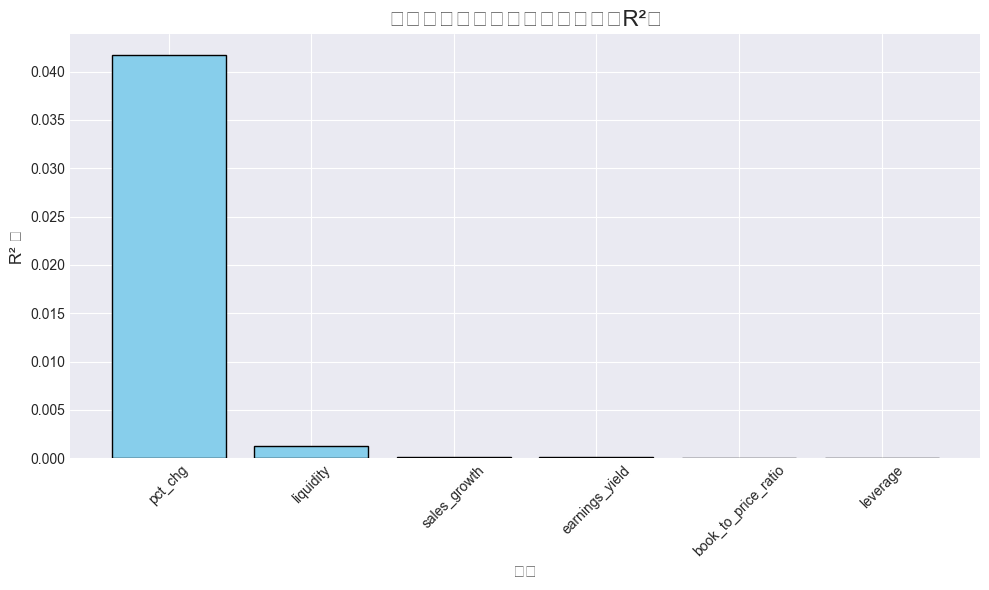

/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:46: UserWarning: Glyph 22797 (\N{CJK UNIFIED IDEOGRAPH-590D}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:46: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:46: UserWarning: Glyph 22240 (\N{CJK UNIFIED IDEOGRAPH-56E0}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:46: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:46: UserWarning: Glyph 26435 (\N{CJK UNIFIED IDEOGRAPH-6743}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_3

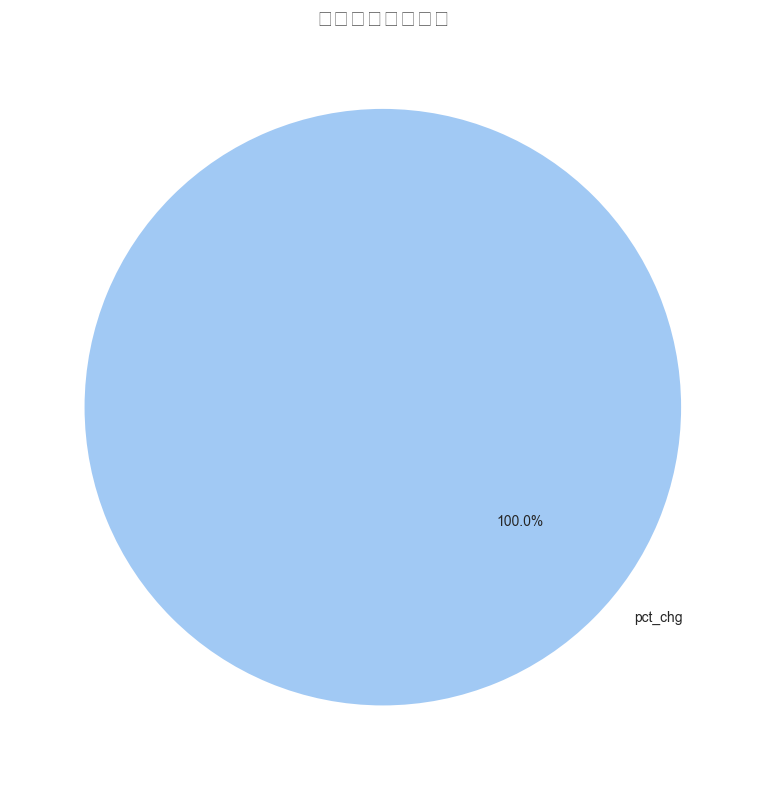

/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:60: UserWarning: Glyph 22797 (\N{CJK UNIFIED IDEOGRAPH-590D}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:60: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:60: UserWarning: Glyph 22240 (\N{CJK UNIFIED IDEOGRAPH-56E0}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:60: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:60: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_3

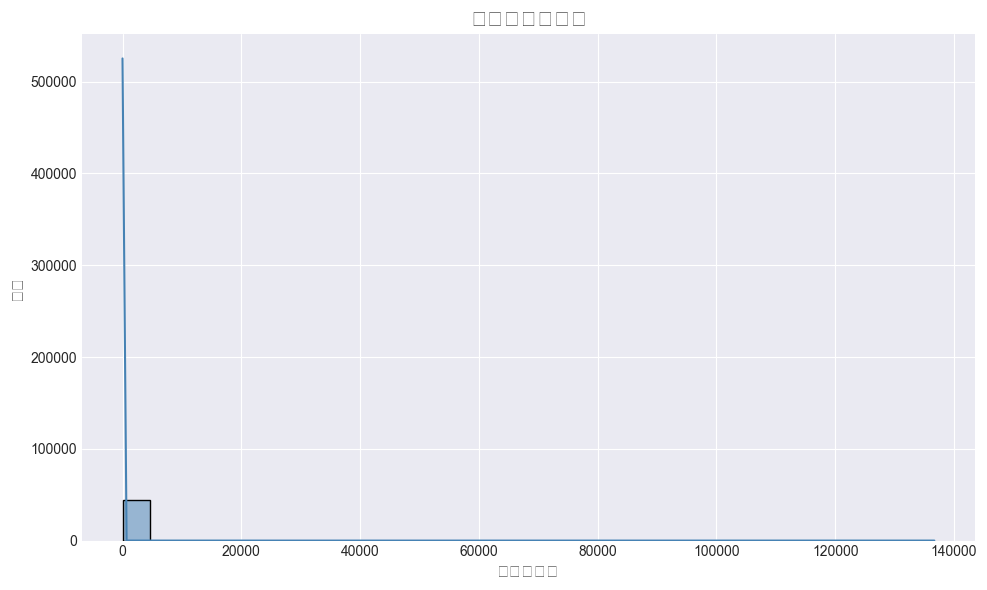

/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:74: UserWarning: Glyph 22797 (\N{CJK UNIFIED IDEOGRAPH-590D}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:74: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:74: UserWarning: Glyph 22240 (\N{CJK UNIFIED IDEOGRAPH-56E0}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:74: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/635532987.py:74: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_3

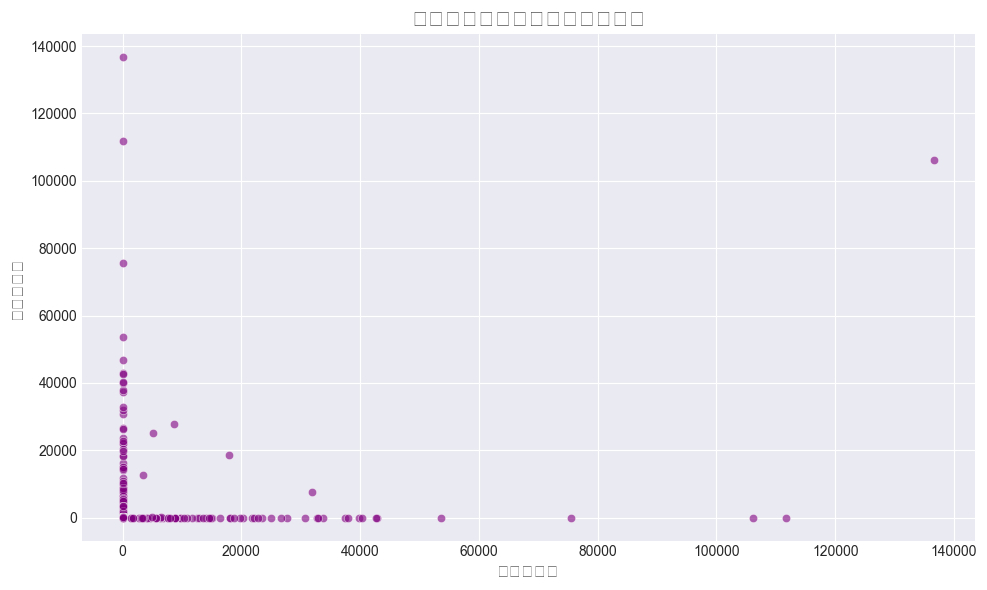

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Matplotlib 样式
plt.style.use('seaborn-darkgrid')

# --- 1. 因子相关性矩阵热图 ---

def plot_correlation_matrix(corr_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("因子相关性矩阵", fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# 绘制相关性矩阵热图
plot_correlation_matrix(correlation_matrix)

# --- 2. 回归分析因子解释能力柱状图（R² 值） ---

def plot_factor_r2_scores(r2_scores):
    sorted_scores = sorted(r2_scores.items(), key=lambda x: x[1], reverse=True)
    factors, scores = zip(*sorted_scores)
    plt.figure(figsize=(10, 6))
    plt.bar(factors, scores, color="skyblue", edgecolor="black")
    plt.xlabel("因子", fontsize=12)
    plt.ylabel("R² 值", fontsize=12)
    plt.title("因子对未来收益率的解释能力（R²）", fontsize=16)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 绘制因子 R² 值柱状图
plot_factor_r2_scores(factor_r2_scores)

# --- 3. 因子权重饼图 ---

def plot_factor_weights(weights):
    factors = list(weights.keys())
    values = list(weights.values())
    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=factors, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title("复合因子权重分布", fontsize=16)
    plt.tight_layout()
    plt.show()

# 绘制因子权重饼图
plot_factor_weights(factor_weights)

# --- 4. 复合因子分布直方图 ---

def plot_composite_factor_distribution(data, column_name="composite_factor"):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column_name], bins=30, kde=True, color="steelblue")
    plt.xlabel("复合因子值", fontsize=12)
    plt.ylabel("频数", fontsize=12)
    plt.title("复合因子值分布", fontsize=16)
    plt.tight_layout()
    plt.show()

# 绘制复合因子分布直方图
plot_composite_factor_distribution(data)

# --- 5. 复合因子与未来收益率的关系散点图 ---

def plot_composite_factor_vs_future_return(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="composite_factor", y="future_return", data=data, alpha=0.6, color="purple")
    plt.xlabel("复合因子值", fontsize=12)
    plt.ylabel("未来收益率", fontsize=12)
    plt.title("复合因子值与未来收益率的关系", fontsize=16)
    plt.tight_layout()
    plt.show()

# 绘制复合因子与未来收益率关系散点图
plot_composite_factor_vs_future_return(data)

In [12]:
data

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,liquidity,eps,earnings_yield,sales_growth,growth,total_debt,total_assets,leverage,future_return,composite_factor
0,600000.SH,20240827,8.87,8.94,8.82,8.88,8.88,32654.212338,32654.212338,306833.75,...,0.112613,-1.995346,-0.224701,0.553952,0.553952,207.126924,2325.384915,0.089072,-0.6757,32654.212338
1,600000.SH,20240828,8.92,8.93,8.76,8.82,8.88,-0.060000,-0.675700,325285.23,...,0.113379,1.991067,0.225745,-0.439003,-0.439003,734.917127,-824.768125,-0.891059,-3.0612,-0.675700
2,600000.SH,20240829,8.82,8.83,8.53,8.55,8.82,-0.270000,-3.061200,509496.48,...,0.116959,-3.685529,-0.431056,0.580298,0.580298,-266.707536,-1078.432896,0.247310,-1.4035,-3.061200
3,600000.SH,20240830,8.54,8.62,8.38,8.43,8.55,-0.120000,-1.403500,683544.43,...,0.118624,3.295962,0.390980,-0.666449,-0.666449,211.874004,1004.072384,0.211015,-0.4745,-1.403500
4,600000.SH,20240902,8.37,8.50,8.35,8.39,8.43,-0.040000,-0.474500,421785.96,...,0.119190,4.562923,0.543853,-0.607223,-0.607223,1440.916583,-2243.384536,-0.642296,-1.6687,-0.474500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45981,689009.SH,20240919,43.11,43.87,42.14,42.61,43.04,-0.430000,-0.999100,106869.64,...,0.023469,-10.136988,-0.237902,-0.291774,-0.291774,390.944512,138.678113,2.819079,-4.1305,-0.999100
45982,689009.SH,20240923,40.93,41.85,40.37,40.85,40.85,NaN,NaN,61189.00,...,0.024480,-0.248179,-0.006075,2.027099,2.027099,-1912.956563,-4461.822947,0.428739,2.9376,NaN
45983,689009.SH,20240924,41.72,42.18,40.08,42.05,40.85,1.200000,2.937600,93513.41,...,0.023781,4.615453,0.109761,1.465656,1.465656,-1433.734271,-235.504533,6.087926,-4.0666,2.937600
45984,689009.SH,20240925,42.40,42.45,40.20,40.34,42.05,-1.710000,-4.066600,114889.79,...,0.024789,7.003006,0.173600,-0.541579,-0.541579,2.600396,742.144903,0.003504,1.3386,-4.066600


In [13]:
print(list(data.columns))

['ts_code', 'trade_date', 'open', 'high', 'low', 'close', 'pre_close', 'change', 'pct_chg', 'vol', 'amount', 'new_column', 'market_cap', 'size', 'beta', 'momentum', 'residual_volatility', 'non_linear_size', 'book_value', 'book_to_price_ratio', 'liquidity', 'eps', 'earnings_yield', 'sales_growth', 'growth', 'total_debt', 'total_assets', 'leverage', 'future_return', 'composite_factor']


时间序列数据形状: (21, 2266)


/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27431 (\N{CJK UNIFIED IDEOGRAPH-6B27}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20960 (\N{CJK UNIFIED IDEOGRAPH-51E0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37324 (\N{CJK UNIFIED IDEOGRAPH-91CC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24471 (\N{CJK UNIFIED IDEOGRAPH-5F97}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 363

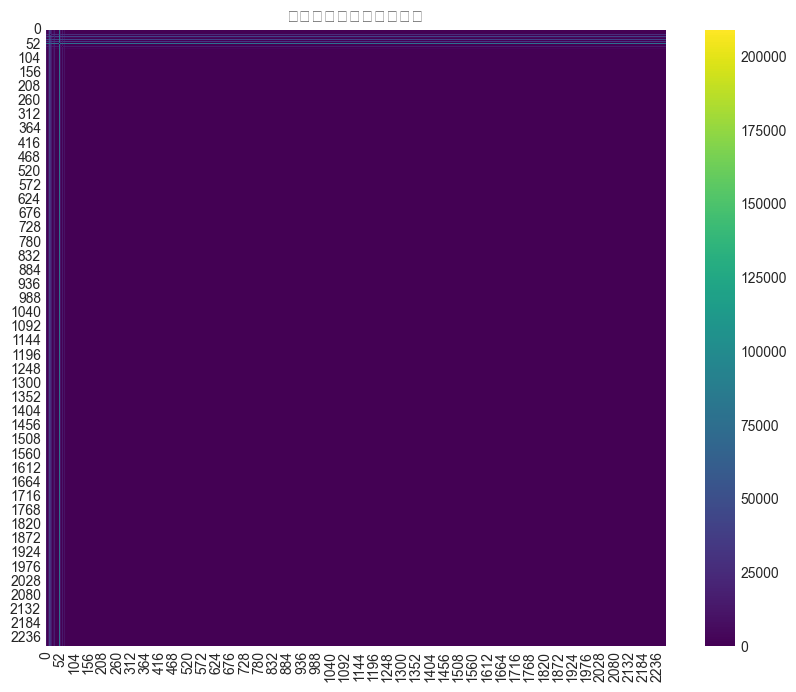

/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/3437867132.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster_label', data=stock_cluster_mapping, palette="Set2")
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31080 (\N{CJK UNIFIED IDEOGRAPH-7968}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io

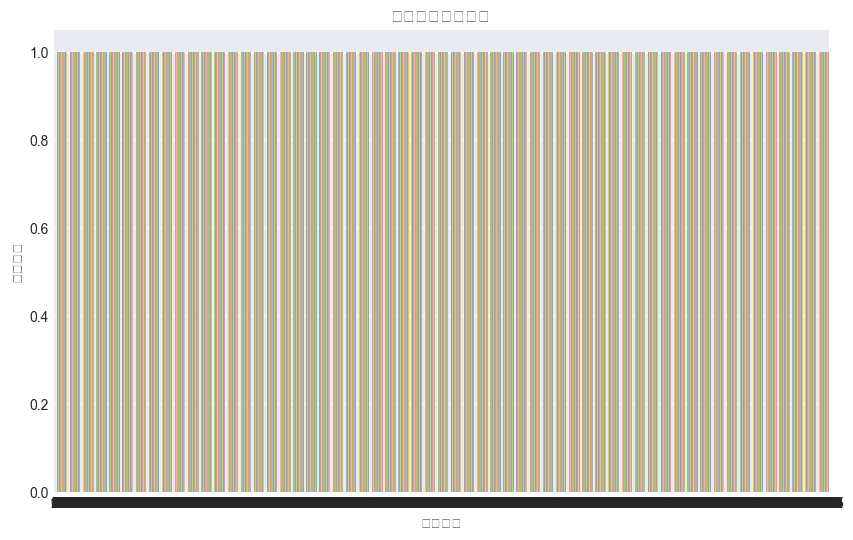

聚类评估错误：Number of labels is 2266. Valid values are 2 to n_samples - 1 (inclusive)


/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/3437867132.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_label', y='composite_factor', data=data, palette="Set3")
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22797 (\N{CJK UNIFIED IDEOGRAPH-590D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22240 (\N{CJK UNIFIED IDEOGRAPH-56E0}) missing from current font.
  fig.canvas.print_figure(bytes

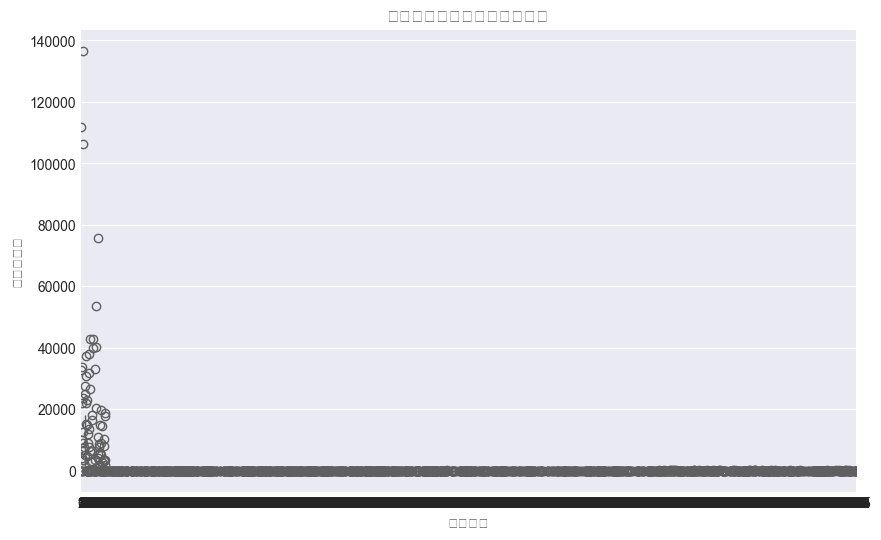

各类别股票特征均值：
               book_to_price_ratio  earnings_yield  momentum  sales_growth
cluster_label                                                             
0                        -0.000008       -0.076331       NaN      0.126258
1                        -0.000008       -0.194845       NaN      0.076926
2                        -0.000011       -0.044078       NaN     -0.108010
3                         0.000048        0.007140       NaN      0.358587
4                        -0.000028       -0.168573       NaN      0.213871
...                            ...             ...       ...           ...
2261                      0.000267        0.018931       NaN     -0.034961
2262                      0.000200        0.063389       NaN      0.188941
2263                      0.000026        0.087757       NaN      0.048797
2264                      0.000003        0.027124       NaN      0.199700
2265                     -0.000005        0.045589       NaN      0.201565

[2266 rows x 

/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/3437867132.py:92: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/3437867132.py:92: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/3437867132.py:92: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/3437867132.py:92: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_37722/3437867132.py:92: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  plt.tight_layout()
/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipyker

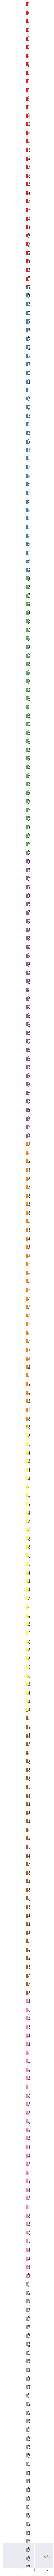

In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import AffinityPropagation
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
data = pd.read_csv('merged_data_001_with_composite_factor.csv')

# --- 1. 欧几里得距离度量 ---
# 选择用于聚类的股票复合因子序列
time_series_data = data.pivot(index='trade_date', columns='ts_code', values='composite_factor').fillna(0)

# 确保时间序列数据正确
if time_series_data.isnull().values.any():
    print("警告：时间序列数据中存在 NaN 值，已用 0 填充。")

# 检查时间序列的形状
print(f"时间序列数据形状: {time_series_data.shape}")

# 计算欧几里得距离
def compute_euclidean_distance_matrix(ts_data):
    n = ts_data.shape[1]  # 股票数量
    similarity_matrix = cdist(ts_data.T, ts_data.T, metric='euclidean')  # 计算欧几里得距离矩阵
    return similarity_matrix

# 调用欧几里得距离计算函数
similarity_matrix = compute_euclidean_distance_matrix(time_series_data)

# 转换为相似性矩阵 (距离越小表示越相似)
affinity_matrix = -similarity_matrix  # 负值表示越相似

# 可视化欧几里得相似性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap="viridis")
plt.title("欧几里得距离相似性矩阵")
plt.show()

# --- 2. AP聚类算法 ---
# 使用AP聚类
ap = AffinityPropagation(affinity='precomputed', damping=0.75, preference=-np.median(affinity_matrix))
ap.fit(affinity_matrix)

# 获取聚类标签
labels = ap.labels_

# 将聚类结果添加到原始数据中
stock_names = time_series_data.columns  # 获取股票代码
stock_cluster_mapping = pd.DataFrame({'ts_code': stock_names, 'cluster_label': labels})
data = data.merge(stock_cluster_mapping, on='ts_code')

# 聚类结果可视化
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster_label', data=stock_cluster_mapping, palette="Set2")
plt.title("股票聚类类别分布")
plt.xlabel("聚类类别")
plt.ylabel("股票数量")
plt.show()

# --- 聚类结果评估 ---
# 计算轮廓系数和Calinski-Harabasz指数
try:
    silhouette_avg = silhouette_score(affinity_matrix, labels, metric="precomputed")
    calinski_harabasz = calinski_harabasz_score(affinity_matrix, labels)
    print(f"轮廓系数: {silhouette_avg}")
    print(f"Calinski-Harabasz指数: {calinski_harabasz}")
except ValueError as e:
    print(f"聚类评估错误：{e}")

# --- 3. 类别分布分析 ---
# 分析各类别股票的复合因子分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_label', y='composite_factor', data=data, palette="Set3")
plt.title("不同聚类类别的复合因子分布")
plt.xlabel("聚类类别")
plt.ylabel("复合因子值")
plt.show()

# 分析各类别股票的特征均值
cluster_characteristics = data.groupby('cluster_label')[['book_to_price_ratio', 'earnings_yield', 'momentum', 'sales_growth']].mean()
print("各类别股票特征均值：")
print(cluster_characteristics)

# 类别特征可视化
cluster_characteristics.T.plot(kind='bar', figsize=(12, 6), colormap="Set1")
plt.title("不同聚类类别的特征均值对比")
plt.xlabel("特征")
plt.ylabel("均值")
plt.legend(title="聚类类别")
plt.tight_layout()
plt.show()

In [8]:
!pip install fastdtw

  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp38-cp38-macosx_11_0_arm64.whl size=96426 sha256=86b42c99f38279a6600ec278562e5d7f066b643adc4dc3b3b8cb4168e890618c
  Stored in directory: /Users/a1/Library/Caches/pip/wheels/e9/ac/30/c962f9d759dd68cb5482727c44441fdfb48040fdbe983857e8
Successfully built fastdtw


In [19]:
data = pd.read_csv('merged_data_001_with_composite_factor.csv')

In [20]:
data

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,liquidity,eps,earnings_yield,sales_growth,growth,total_debt,total_assets,leverage,future_return,composite_factor
0,600000.SH,20240827,8.87,8.94,8.82,8.88,8.88,32654.212338,32654.212338,306833.75,...,0.112613,-1.995346,-0.224701,0.553952,0.553952,207.126924,2325.384915,0.089072,-0.6757,32654.212338
1,600000.SH,20240828,8.92,8.93,8.76,8.82,8.88,-0.060000,-0.675700,325285.23,...,0.113379,1.991067,0.225745,-0.439003,-0.439003,734.917127,-824.768125,-0.891059,-3.0612,-0.675700
2,600000.SH,20240829,8.82,8.83,8.53,8.55,8.82,-0.270000,-3.061200,509496.48,...,0.116959,-3.685529,-0.431056,0.580298,0.580298,-266.707536,-1078.432896,0.247310,-1.4035,-3.061200
3,600000.SH,20240830,8.54,8.62,8.38,8.43,8.55,-0.120000,-1.403500,683544.43,...,0.118624,3.295962,0.390980,-0.666449,-0.666449,211.874004,1004.072384,0.211015,-0.4745,-1.403500
4,600000.SH,20240902,8.37,8.50,8.35,8.39,8.43,-0.040000,-0.474500,421785.96,...,0.119190,4.562923,0.543853,-0.607223,-0.607223,1440.916583,-2243.384536,-0.642296,-1.6687,-0.474500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45981,689009.SH,20240919,43.11,43.87,42.14,42.61,43.04,-0.430000,-0.999100,106869.64,...,0.023469,-10.136988,-0.237902,-0.291774,-0.291774,390.944512,138.678113,2.819079,-4.1305,-0.999100
45982,689009.SH,20240923,40.93,41.85,40.37,40.85,40.85,NaN,NaN,61189.00,...,0.024480,-0.248179,-0.006075,2.027099,2.027099,-1912.956563,-4461.822947,0.428739,2.9376,NaN
45983,689009.SH,20240924,41.72,42.18,40.08,42.05,40.85,1.200000,2.937600,93513.41,...,0.023781,4.615453,0.109761,1.465656,1.465656,-1433.734271,-235.504533,6.087926,-4.0666,2.937600
45984,689009.SH,20240925,42.40,42.45,40.20,40.34,42.05,-1.710000,-4.066600,114889.79,...,0.024789,7.003006,0.173600,-0.541579,-0.541579,2.600396,742.144903,0.003504,1.3386,-4.066600


In [21]:
print(list(data.columns))

['ts_code', 'trade_date', 'open', 'high', 'low', 'close', 'pre_close', 'change', 'pct_chg', 'vol', 'amount', 'new_column', 'market_cap', 'size', 'beta', 'momentum', 'residual_volatility', 'non_linear_size', 'book_value', 'book_to_price_ratio', 'liquidity', 'eps', 'earnings_yield', 'sales_growth', 'growth', 'total_debt', 'total_assets', 'leverage', 'future_return', 'composite_factor']


In [22]:
import pandas as pd

# 检查并输入正确的文件路径
file_path = '/home/ruizhang/data_001/励京资本/df_AP001.csv'  # 修改为正确的文件路径

try:
    merged_data_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [ ]:
merged_data_001

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,liquidity,eps,earnings_yield,sales_growth,growth,total_debt,total_assets,leverage,future_return,composite_factor
0,600000.SH,20240827,8.87,8.94,8.82,8.88,8.88,32654.212338,32654.212338,306833.75,...,0.112613,-1.995346,-0.224701,0.553952,0.553952,207.126924,2325.384915,0.089072,-0.6757,32654.212338
1,600000.SH,20240828,8.92,8.93,8.76,8.82,8.88,-0.060000,-0.675700,325285.23,...,0.113379,1.991067,0.225745,-0.439003,-0.439003,734.917127,-824.768125,-0.891059,-3.0612,-0.675700
2,600000.SH,20240829,8.82,8.83,8.53,8.55,8.82,-0.270000,-3.061200,509496.48,...,0.116959,-3.685529,-0.431056,0.580298,0.580298,-266.707536,-1078.432896,0.247310,-1.4035,-3.061200
3,600000.SH,20240830,8.54,8.62,8.38,8.43,8.55,-0.120000,-1.403500,683544.43,...,0.118624,3.295962,0.390980,-0.666449,-0.666449,211.874004,1004.072384,0.211015,-0.4745,-1.403500
4,600000.SH,20240902,8.37,8.50,8.35,8.39,8.43,-0.040000,-0.474500,421785.96,...,0.119190,4.562923,0.543853,-0.607223,-0.607223,1440.916583,-2243.384536,-0.642296,-1.6687,-0.474500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45981,689009.SH,20240919,43.11,43.87,42.14,42.61,43.04,-0.430000,-0.999100,106869.64,...,0.023469,-10.136988,-0.237902,-0.291774,-0.291774,390.944512,138.678113,2.819079,-4.1305,-0.999100
45982,689009.SH,20240923,40.93,41.85,40.37,40.85,40.85,NaN,NaN,61189.00,...,0.024480,-0.248179,-0.006075,2.027099,2.027099,-1912.956563,-4461.822947,0.428739,2.9376,NaN
45983,689009.SH,20240924,41.72,42.18,40.08,42.05,40.85,1.200000,2.937600,93513.41,...,0.023781,4.615453,0.109761,1.465656,1.465656,-1433.734271,-235.504533,6.087926,-4.0666,2.937600
45984,689009.SH,20240925,42.40,42.45,40.20,40.34,42.05,-1.710000,-4.066600,114889.79,...,0.024789,7.003006,0.173600,-0.541579,-0.541579,2.600396,742.144903,0.003504,1.3386,-4.066600


In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# 加载数据
data = merged_data_001

# --- 1. 检查和删除全是 NaN 的列 ---
# 检查每列是否全是 NaN
data_cleaned = data.dropna(axis=1, how='all')

# --- 2. 分离数值型和非数值型列 ---
# 数值型特征
numeric_cols = data_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# 非数值型特征
non_numeric_cols = data_cleaned.select_dtypes(exclude=[np.number]).columns.tolist()

In [4]:
data_cleaned = data_cleaned.fillna(0)

In [ ]:
# --- 3. 填充部分 NaN 的数值型列 ---
for column in numeric_cols:
    if data_cleaned[column].isnull().sum() > 0:  # 如果有 NaN 值
        # 选择除当前列外的其他特征列作为特征
        X = data_cleaned.drop(columns=[column] + non_numeric_cols)  # 排除非数值型列
        y = data_cleaned[column]
        
        # 只保留非 NaN 的行来训练决策树
        X_train = X[~y.isnull()]
        y_train = y.dropna()

        # 如果有 NaN 的数据
        X_test = X[y.isnull()]
        
        # 训练决策树回归模型
        model = DecisionTreeRegressor(random_state=42)
        model.fit(X_train, y_train)

        # 填充 NaN 值
        data_cleaned.loc[y.isnull(), column] = model.predict(X_test)

# --- 4. 检查填充后的结果 ---
print("\n填充后的缺失情况：")
print(data_cleaned.isnull().sum())

# 输出填充后的数据头部
print(data_cleaned.head())

# --- 5. 继续后续的机器学习分析 ---
# 特征选择和目标变量构建
features = ['composite_factor', 'book_to_price_ratio', 'earnings_yield', 'sales_growth']
target_col = 'future_return'

# 构建目标变量：上涨/不涨
data_cleaned['target'] = (data_cleaned['future_return'] > 0).astype(int)

# 提取特征和目标变量
X = data_cleaned[features]
y = data_cleaned['target']

# 标准化特征
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 继续后续的机器学习训练...


填充后的缺失情况：
ts_code                0
trade_date             0
open                   0
high                   0
low                    0
close                  0
pre_close              0
change                 0
pct_chg                0
vol                    0
amount                 0
new_column             0
market_cap             0
size                   0
non_linear_size        0
book_value             0
book_to_price_ratio    0
liquidity              0
eps                    0
earnings_yield         0
sales_growth           0
growth                 0
total_debt             0
total_assets           0
leverage               0
future_return          0
composite_factor       0
dtype: int64
     ts_code  trade_date  open  high   low  close  pre_close        change  \
0  600000.SH    20240827  8.87  8.94  8.82   8.88       8.88  32654.212338   
1  600000.SH    20240828  8.92  8.93  8.76   8.82       8.88     -0.060000   
2  600000.SH    20240829  8.82  8.83  8.53   8.55       8.82     -0

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# --- 3. 模型选择与训练 ---

# 使用 Stratified KFold 对数据进行分层抽样，以保证类别分布均匀
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 定义模型
models = {
    'SVM': SVC(probability=True),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

# --- 4. 参数优化 ---
# 网格搜索超参数优化
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9],
        'n_estimators': [100, 200],
        'subsample': [0.8, 1]
    }
}

# 定义结果字典
results = {}

# 遍历每个模型进行训练和优化
for model_name, model in models.items():
    print(f"正在训练 {model_name} 模型...")

    # 网格搜索
    grid_search = GridSearchCV(model, param_grids[model_name], cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_scaled, y)

    # 输出最佳参数
    print(f"{model_name} 最佳参数: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    # 在测试集上评估模型
    y_pred = best_model.predict(X_scaled)
    accuracy = accuracy_score(y, y_pred)
    auc = roc_auc_score(y, best_model.predict_proba(X_scaled)[:, 1])  # 预测概率的 AUC

    print(f"{model_name} 准确率: {accuracy:.4f}")
    print(f"{model_name} AUC: {auc:.4f}")
    
    # 保存结果
    results[model_name] = {
        'Best Model': best_model,
        'Accuracy': accuracy,
        'AUC': auc,
        'Classification Report': classification_report(y, y_pred)
    }

    print(f"{model_name} 训练完成。\n")

# 输出各模型的评估结果
for model_name, result in results.items():
    print(f"{model_name} 结果:")
    print(f"准确率: {result['Accuracy']:.4f}")
    print(f"AUC: {result['AUC']:.4f}")
    print(result['Classification Report'])
    print("="*50)

# --- 5. 训练结果预测：每只股票的预测上涨概率 ---

# 选定模型进行预测（例如选择 AUC 最高的模型）
best_model_name = max(results, key=lambda model: results[model]['AUC'])
best_model = results[best_model_name]['Best Model']

# 预测每只股票的上涨概率
predicted_probabilities = best_model.predict_proba(X_scaled)[:, 1]  # 获取上涨的概率

# 将预测结果添加到数据中
data['predicted_probability'] = predicted_probabilities

# 输出部分预测结果
print(f"\n{best_model_name} 的预测结果：")
print(data[['ts_code', 'trade_date', 'predicted_probability']].head())

正在训练 SVM 模型...


SVM 最佳参数: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVM 准确率: 0.5783
SVM AUC: 0.4989
SVM 训练完成。

正在训练 RandomForest 模型...


/home/ruizhang/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ruizhang/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ruizhang/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForest 最佳参数: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
RandomForest 准确率: 0.5793
RandomForest AUC: 0.5747
RandomForest 训练完成。

正在训练 XGBoost 模型...
XGBoost 最佳参数: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
XGBoost 准确率: 0.5788
XGBoost AUC: 0.5974
XGBoost 训练完成。

SVM 结果:
准确率: 0.5783
AUC: 0.4989
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     19394
           1       0.58      1.00      0.73     26592

    accuracy                           0.58     45986
   macro avg       0.29      0.50      0.37     45986
weighted avg       0.33      0.58      0.42     45986

RandomForest 结果:
准确率: 0.5793
AUC: 0.5747
              precision    recall  f1-score   support

           0       0.86      0.00      0.01     19394
           1       0.58      1.00      0.73     26592

    accuracy                           0.58     45986
   macro avg       0.72      0.50      0.37     45986
weighted a

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

<Figure size 1000x600 with 0 Axes>

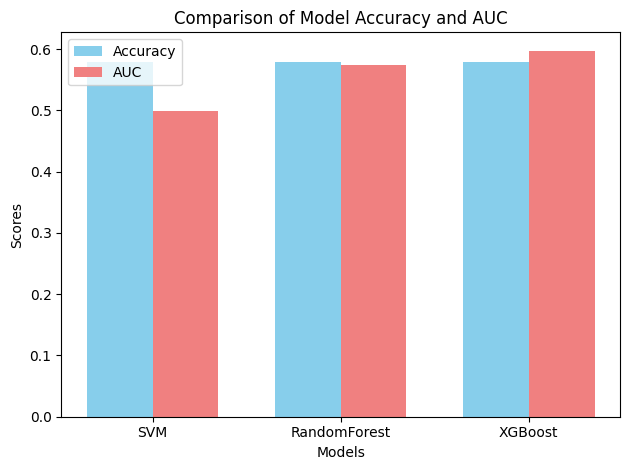

In [29]:
# 获取模型的准确率和 AUC
model_names = list(results.keys())
accuracies = [results[model]['Accuracy'] for model in model_names]
aucs = [results[model]['AUC'] for model in model_names]

# 设置图形尺寸
plt.figure(figsize=(10, 6))

# 绘制准确率和 AUC 的柱状图
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots()

bar1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
bar2 = ax.bar(x + width/2, aucs, width, label='AUC', color='lightcoral')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Accuracy and AUC')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# 显示图形
plt.tight_layout()
plt.show()

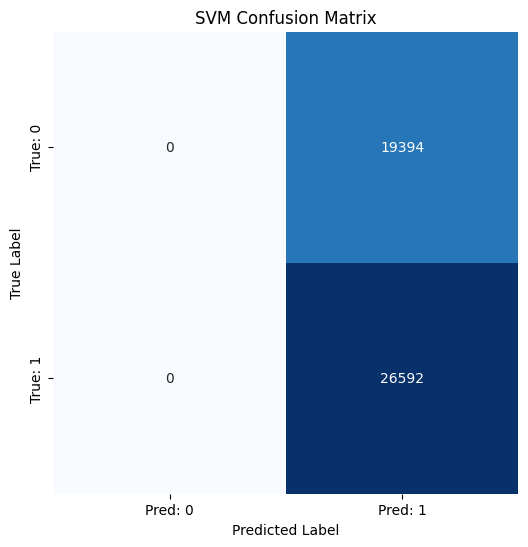

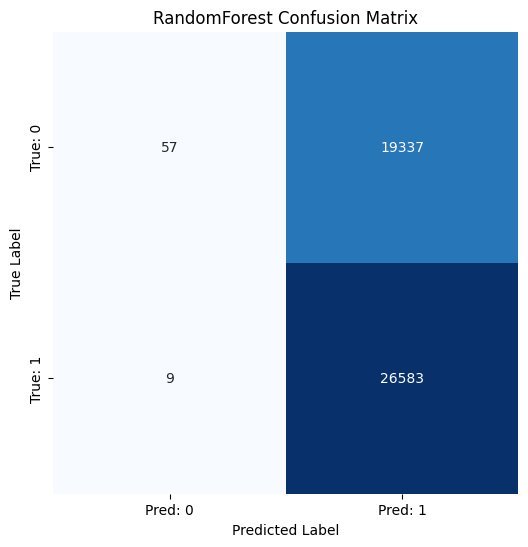

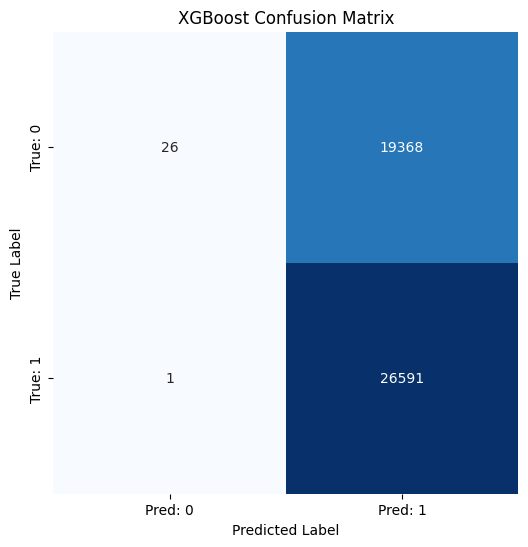

In [30]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# 绘制每个模型的混淆矩阵
for model_name, result in results.items():
    y_pred = result['Best Model'].predict(X_scaled)
    plot_confusion_matrix(y, y_pred, model_name)

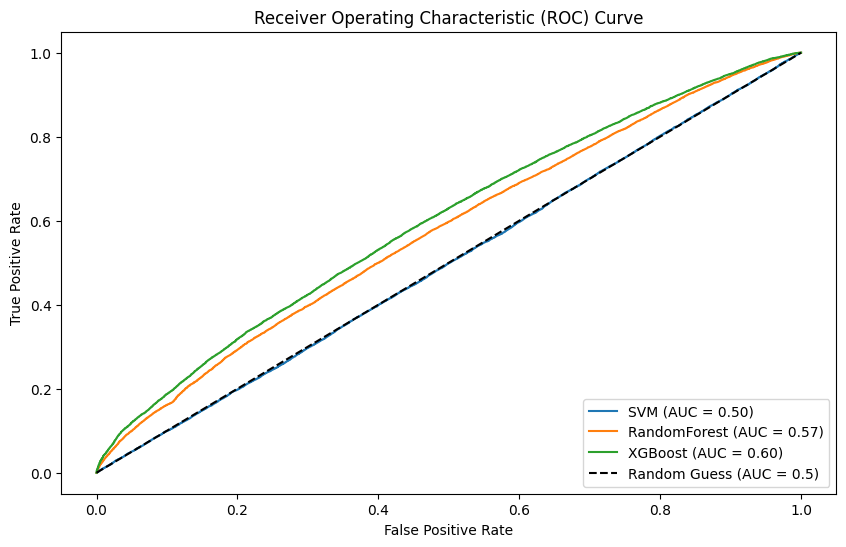

In [31]:
def plot_roc_curve(fpr, tpr, auc, model_name):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

# 绘制每个模型的 ROC 曲线
plt.figure(figsize=(10, 6))
for model_name, result in results.items():
    y_pred_prob = result['Best Model'].predict_proba(X_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_prob)
    auc_score = auc(fpr, tpr)
    plot_roc_curve(fpr, tpr, auc_score, model_name)

# 绘制随机猜测的 ROC 曲线（即对角线）
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

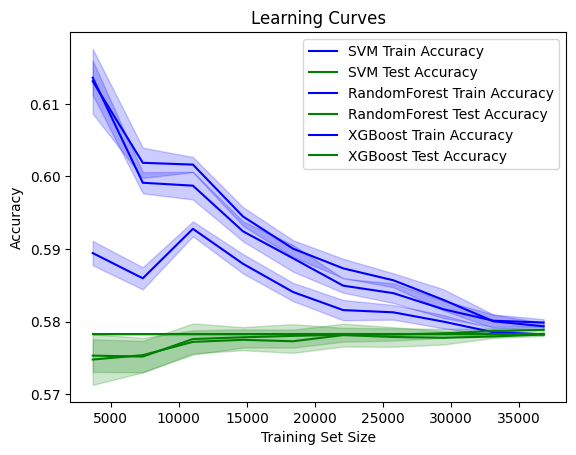

In [32]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=kf, n_jobs=-1, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # 计算训练和验证的平均值和标准差
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # 绘制学习曲线
    plt.plot(train_sizes, train_mean, label=f'{model_name} Train Accuracy', color='blue')
    plt.plot(train_sizes, test_mean, label=f'{model_name} Test Accuracy', color='green')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

# 绘制每个模型的学习曲线
for model_name, result in results.items():
    model = result['Best Model']
    plot_learning_curve(model, X_scaled, y, model_name)

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [34]:
# 选定模型进行预测（例如选择 AUC 最高的模型）
best_model_name = max(results, key=lambda model: results[model]['AUC'])
best_model = results[best_model_name]['Best Model']

# 预测每只股票的上涨概率
predicted_probabilities = best_model.predict_proba(X_scaled)[:, 1]  # 获取上涨的概率

# 将预测结果添加到数据中
data['predicted_probability'] = predicted_probabilities

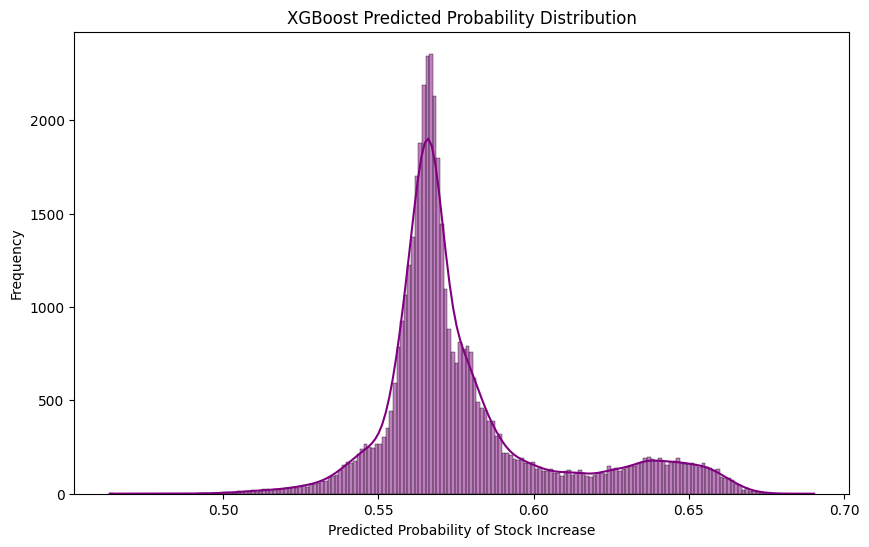

In [35]:
# 绘制预测概率的分布
plt.figure(figsize=(10, 6))
sns.histplot(data['predicted_probability'], kde=True, color='purple')
plt.title(f'{best_model_name} Predicted Probability Distribution')
plt.xlabel('Predicted Probability of Stock Increase')
plt.ylabel('Frequency')
plt.show()

In [23]:
data = merged_data_001

In [36]:
data

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,earnings_yield,sales_growth,growth,total_debt,total_assets,leverage,future_return,composite_factor,cluster_label,predicted_probability
0,600000.SH,20240827,8.87,8.94,8.82,8.88,8.88,32654.212338,32654.212338,306833.75,...,-0.224701,0.553952,0.553952,207.126924,2325.384915,0.089072,-0.6757,32654.212338,0,0.527242
1,600000.SH,20240828,8.92,8.93,8.76,8.82,8.88,-0.060000,-0.675700,325285.23,...,0.225745,-0.439003,-0.439003,734.917127,-824.768125,-0.891059,-3.0612,-0.675700,0,0.568384
2,600000.SH,20240829,8.82,8.83,8.53,8.55,8.82,-0.270000,-3.061200,509496.48,...,-0.431056,0.580298,0.580298,-266.707536,-1078.432896,0.247310,-1.4035,-3.061200,0,0.536802
3,600000.SH,20240830,8.54,8.62,8.38,8.43,8.55,-0.120000,-1.403500,683544.43,...,0.390980,-0.666449,-0.666449,211.874004,1004.072384,0.211015,-0.4745,-1.403500,0,0.567349
4,600000.SH,20240902,8.37,8.50,8.35,8.39,8.43,-0.040000,-0.474500,421785.96,...,0.543853,-0.607223,-0.607223,1440.916583,-2243.384536,-0.642296,-1.6687,-0.474500,0,0.568041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45981,689009.SH,20240919,43.11,43.87,42.14,42.61,43.04,-0.430000,-0.999100,106869.64,...,-0.237902,-0.291774,-0.291774,390.944512,138.678113,2.819079,-4.1305,-0.999100,2265,0.581852
45982,689009.SH,20240923,40.93,41.85,40.37,40.85,40.85,0.000000,0.000000,61189.00,...,-0.006075,2.027099,2.027099,-1912.956563,-4461.822947,0.428739,2.9376,0.000000,2265,0.567905
45983,689009.SH,20240924,41.72,42.18,40.08,42.05,40.85,1.200000,2.937600,93513.41,...,0.109761,1.465656,1.465656,-1433.734271,-235.504533,6.087926,-4.0666,2.937600,2265,0.607022
45984,689009.SH,20240925,42.40,42.45,40.20,40.34,42.05,-1.710000,-4.066600,114889.79,...,0.173600,-0.541579,-0.541579,2.600396,742.144903,0.003504,1.3386,-4.066600,2265,0.561680


In [26]:
data = data.fillna(0)

In [12]:
print(list(data.columns))

['ts_code', 'trade_date', 'open', 'high', 'low', 'close', 'pre_close', 'change', 'pct_chg', 'vol', 'amount', 'new_column', 'market_cap', 'size', 'beta', 'momentum', 'residual_volatility', 'non_linear_size', 'book_value', 'book_to_price_ratio', 'liquidity', 'eps', 'earnings_yield', 'sales_growth', 'growth', 'total_debt', 'total_assets', 'leverage', 'future_return', 'composite_factor']


In [37]:
# 假设数据中已经有了聚类标签 'cluster_label' 和预测上涨概率 'predicted_probability'

# 按照每个聚类类别，选择概率最高的股票
selected_stocks = []

# 逐个聚类类别进行处理
for cluster in data['cluster_label'].unique():
    cluster_data = data[data['cluster_label'] == cluster]
    top_stock = cluster_data.loc[cluster_data['predicted_probability'].idxmax()]  # 选出预测上涨概率最高的股票
    selected_stocks.append(top_stock)

# 将所有选中的股票组合成一个新的DataFrame
selected_stocks_df = pd.DataFrame(selected_stocks)

# 打印选中的股票
print(selected_stocks_df[['ts_code', 'trade_date', 'cluster_label', 'predicted_probability']])

         ts_code  trade_date  cluster_label  predicted_probability
20     600000.SH    20240926              0               0.659179
41     600004.SH    20240926              1               0.654884
48     600006.SH    20240904              2               0.616824
72     600007.SH    20240909              3               0.649606
99     600008.SH    20240919              4               0.655439
...          ...         ...            ...                    ...
45904  688799.SH    20240926           2261               0.651418
45907  688800.SH    20240829           2262               0.640140
45926  688819.SH    20240829           2263               0.630540
45965  688981.SH    20240926           2264               0.651844
45968  689009.SH    20240829           2265               0.644414

[2266 rows x 4 columns]


In [38]:
# 为选中的每只股票分配等权重
selected_stocks_df['weight_equal'] = 1 / len(selected_stocks_df)

# 打印等权重分配结果
print(selected_stocks_df[['ts_code', 'weight_equal']])

         ts_code  weight_equal
20     600000.SH      0.000441
41     600004.SH      0.000441
48     600006.SH      0.000441
72     600007.SH      0.000441
99     600008.SH      0.000441
...          ...           ...
45904  688799.SH      0.000441
45907  688800.SH      0.000441
45926  688819.SH      0.000441
45965  688981.SH      0.000441
45968  689009.SH      0.000441

[2266 rows x 2 columns]


In [40]:
selected_stocks_df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,sales_growth,growth,total_debt,total_assets,leverage,future_return,composite_factor,cluster_label,predicted_probability,weight_equal
20,600000.SH,20240926,9.50,9.84,9.43,9.84,9.49,0.350000,3.688100,898390.05,...,1.086731,1.086731,-71.829015,-110.471989,0.650201,0.3049,3.688100,0,0.659179,0.000441
41,600004.SH,20240926,9.09,9.48,9.03,9.48,9.09,0.390000,4.290400,247914.52,...,-0.590142,-0.590142,-175.363064,1973.725848,-0.088849,3.1646,4.290400,1,0.654884,0.000441
48,600006.SH,20240904,5.82,6.01,5.81,5.90,5.90,9882.945977,9882.945977,269255.00,...,-0.875561,-0.875561,-144.080444,-1585.658160,0.090865,1.1864,9882.945977,2,0.616824,0.000441
72,600007.SH,20240909,21.86,22.72,21.73,22.65,21.83,0.820000,3.756300,26005.51,...,0.885967,0.885967,-464.333573,-152.990680,3.035045,0.4415,3.756300,3,0.649606,0.000441
99,600008.SH,20240919,2.76,2.87,2.75,2.86,2.76,0.100000,3.623200,780095.97,...,-0.176784,-0.176784,932.840644,-57.558935,-16.206704,-2.0979,3.623200,4,0.655439,0.000441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45904,688799.SH,20240926,39.75,41.40,39.55,41.26,40.10,1.160000,2.892800,6360.53,...,-0.383099,-0.383099,-1559.128986,2136.047377,-0.729913,6.1561,2.892800,2261,0.651418,0.000441
45907,688800.SH,20240829,20.85,22.08,20.79,21.86,21.14,0.720000,3.405900,12856.02,...,0.053467,0.053467,-101.716083,608.330182,-0.167205,1.0979,3.405900,2262,0.640140,0.000441
45926,688819.SH,20240829,22.80,24.24,22.76,24.07,22.10,1.970000,8.914000,64032.59,...,-0.815592,-0.815592,236.882252,692.684814,0.341977,2.4512,8.914000,2263,0.630540,0.000441
45965,688981.SH,20240926,45.00,46.49,44.77,46.36,44.90,1.460000,3.251700,260172.72,...,1.008387,1.008387,1323.439181,1243.512766,1.064275,7.8300,3.251700,2264,0.651844,0.000441


In [41]:
selected_stocks_df_001 = selected_stocks_df

In [49]:
selected_stocks_df_001

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,growth,total_debt,total_assets,leverage,future_return,composite_factor,cluster_label,predicted_probability,weight_equal,returns
20,600000.SH,20240926,9.50,9.84,9.43,9.84,9.49,0.350000,3.688100,898390.05,...,1.086731,-71.829015,-110.471989,0.650201,0.3049,3.688100,0,0.659179,0.000441,NaN
41,600004.SH,20240926,9.09,9.48,9.03,9.48,9.09,0.390000,4.290400,247914.52,...,-0.590142,-175.363064,1973.725848,-0.088849,3.1646,4.290400,1,0.654884,0.000441,NaN
48,600006.SH,20240904,5.82,6.01,5.81,5.90,5.90,9882.945977,9882.945977,269255.00,...,-0.875561,-144.080444,-1585.658160,0.090865,1.1864,9882.945977,2,0.616824,0.000441,NaN
72,600007.SH,20240909,21.86,22.72,21.73,22.65,21.83,0.820000,3.756300,26005.51,...,0.885967,-464.333573,-152.990680,3.035045,0.4415,3.756300,3,0.649606,0.000441,NaN
99,600008.SH,20240919,2.76,2.87,2.75,2.86,2.76,0.100000,3.623200,780095.97,...,-0.176784,932.840644,-57.558935,-16.206704,-2.0979,3.623200,4,0.655439,0.000441,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45904,688799.SH,20240926,39.75,41.40,39.55,41.26,40.10,1.160000,2.892800,6360.53,...,-0.383099,-1559.128986,2136.047377,-0.729913,6.1561,2.892800,2261,0.651418,0.000441,NaN
45907,688800.SH,20240829,20.85,22.08,20.79,21.86,21.14,0.720000,3.405900,12856.02,...,0.053467,-101.716083,608.330182,-0.167205,1.0979,3.405900,2262,0.640140,0.000441,NaN
45926,688819.SH,20240829,22.80,24.24,22.76,24.07,22.10,1.970000,8.914000,64032.59,...,-0.815592,236.882252,692.684814,0.341977,2.4512,8.914000,2263,0.630540,0.000441,NaN
45965,688981.SH,20240926,45.00,46.49,44.77,46.36,44.90,1.460000,3.251700,260172.72,...,1.008387,1323.439181,1243.512766,1.064275,7.8300,3.251700,2264,0.651844,0.000441,NaN


In [50]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# 假设我们有选中股票的历史收盘价数据，存储在`price_data` DataFrame中，列为股票代码，行是日期
# 获取这些选中股票的收益率数据
selected_tickers = selected_stocks_df_001['ts_code'].tolist()
price_data = selected_stocks_df_001['close']  # 假设函数获取股票价格数据

# 计算股票的日收益率
selected_stocks_df_001['returns'] = price_data.pct_change().dropna()

# 计算日收益率的均值和协方差矩阵
selected_stocks_df_001['mean_returns'] = selected_stocks_df_001['returns'].mean()

In [45]:
returns = returns.fillna(0)

In [44]:
print(returns)

41       -0.036585
48       -0.377637
72        2.838983
99       -0.873731
125      10.842657
           ...    
45904    -0.086562
45907    -0.470189
45926     0.101098
45965     0.926049
45968     0.035807
Name: close, Length: 2265, dtype: float64


In [51]:
selected_stocks_df_001

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,total_debt,total_assets,leverage,future_return,composite_factor,cluster_label,predicted_probability,weight_equal,returns,mean_returns
20,600000.SH,20240926,9.50,9.84,9.43,9.84,9.49,0.350000,3.688100,898390.05,...,-71.829015,-110.471989,0.650201,0.3049,3.688100,0,0.659179,0.000441,NaN,1.155291
41,600004.SH,20240926,9.09,9.48,9.03,9.48,9.09,0.390000,4.290400,247914.52,...,-175.363064,1973.725848,-0.088849,3.1646,4.290400,1,0.654884,0.000441,-0.036585,1.155291
48,600006.SH,20240904,5.82,6.01,5.81,5.90,5.90,9882.945977,9882.945977,269255.00,...,-144.080444,-1585.658160,0.090865,1.1864,9882.945977,2,0.616824,0.000441,-0.377637,1.155291
72,600007.SH,20240909,21.86,22.72,21.73,22.65,21.83,0.820000,3.756300,26005.51,...,-464.333573,-152.990680,3.035045,0.4415,3.756300,3,0.649606,0.000441,2.838983,1.155291
99,600008.SH,20240919,2.76,2.87,2.75,2.86,2.76,0.100000,3.623200,780095.97,...,932.840644,-57.558935,-16.206704,-2.0979,3.623200,4,0.655439,0.000441,-0.873731,1.155291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45904,688799.SH,20240926,39.75,41.40,39.55,41.26,40.10,1.160000,2.892800,6360.53,...,-1559.128986,2136.047377,-0.729913,6.1561,2.892800,2261,0.651418,0.000441,-0.086562,1.155291
45907,688800.SH,20240829,20.85,22.08,20.79,21.86,21.14,0.720000,3.405900,12856.02,...,-101.716083,608.330182,-0.167205,1.0979,3.405900,2262,0.640140,0.000441,-0.470189,1.155291
45926,688819.SH,20240829,22.80,24.24,22.76,24.07,22.10,1.970000,8.914000,64032.59,...,236.882252,692.684814,0.341977,2.4512,8.914000,2263,0.630540,0.000441,0.101098,1.155291
45965,688981.SH,20240926,45.00,46.49,44.77,46.36,44.90,1.460000,3.251700,260172.72,...,1323.439181,1243.512766,1.064275,7.8300,3.251700,2264,0.651844,0.000441,0.926049,1.155291


In [52]:
selected_stocks_df_001 = selected_stocks_df_001.fillna(0)

In [53]:
selected_stocks_df_001

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,total_debt,total_assets,leverage,future_return,composite_factor,cluster_label,predicted_probability,weight_equal,returns,mean_returns
20,600000.SH,20240926,9.50,9.84,9.43,9.84,9.49,0.350000,3.688100,898390.05,...,-71.829015,-110.471989,0.650201,0.3049,3.688100,0,0.659179,0.000441,0.000000,1.155291
41,600004.SH,20240926,9.09,9.48,9.03,9.48,9.09,0.390000,4.290400,247914.52,...,-175.363064,1973.725848,-0.088849,3.1646,4.290400,1,0.654884,0.000441,-0.036585,1.155291
48,600006.SH,20240904,5.82,6.01,5.81,5.90,5.90,9882.945977,9882.945977,269255.00,...,-144.080444,-1585.658160,0.090865,1.1864,9882.945977,2,0.616824,0.000441,-0.377637,1.155291
72,600007.SH,20240909,21.86,22.72,21.73,22.65,21.83,0.820000,3.756300,26005.51,...,-464.333573,-152.990680,3.035045,0.4415,3.756300,3,0.649606,0.000441,2.838983,1.155291
99,600008.SH,20240919,2.76,2.87,2.75,2.86,2.76,0.100000,3.623200,780095.97,...,932.840644,-57.558935,-16.206704,-2.0979,3.623200,4,0.655439,0.000441,-0.873731,1.155291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45904,688799.SH,20240926,39.75,41.40,39.55,41.26,40.10,1.160000,2.892800,6360.53,...,-1559.128986,2136.047377,-0.729913,6.1561,2.892800,2261,0.651418,0.000441,-0.086562,1.155291
45907,688800.SH,20240829,20.85,22.08,20.79,21.86,21.14,0.720000,3.405900,12856.02,...,-101.716083,608.330182,-0.167205,1.0979,3.405900,2262,0.640140,0.000441,-0.470189,1.155291
45926,688819.SH,20240829,22.80,24.24,22.76,24.07,22.10,1.970000,8.914000,64032.59,...,236.882252,692.684814,0.341977,2.4512,8.914000,2263,0.630540,0.000441,0.101098,1.155291
45965,688981.SH,20240926,45.00,46.49,44.77,46.36,44.90,1.460000,3.251700,260172.72,...,1323.439181,1243.512766,1.064275,7.8300,3.251700,2264,0.651844,0.000441,0.926049,1.155291


In [54]:
import pandas as pd

# 假设 selected_stocks_df_001 已经加载进来
# 确保数据按照股票代码（ts_code）和日期（trade_date）排序
# selected_stocks_df_001 = selected_stocks_df_001.sort_values(by=['ts_code', 'trade_date'])

# 计算每日收益率，使用收盘价（close）
# selected_stocks_df_001['returns'] = selected_stocks_df_001.groupby('ts_code')['close'].pct_change()

# 创建一个只包含收益率的 DataFrame
returns_df = selected_stocks_df_001.pivot_table(values='returns', index='trade_date', columns='ts_code')

# 输出收益率 DataFrame
print(returns_df.head())

ts_code     600000.SH  600004.SH  600006.SH  600007.SH  600008.SH  600009.SH  \
trade_date                                                                     
20240827          NaN        NaN        NaN        NaN        NaN        NaN   
20240828          NaN        NaN        NaN        NaN        NaN        NaN   
20240829          NaN        NaN        NaN        NaN        NaN        NaN   
20240830          NaN        NaN        NaN        NaN        NaN        NaN   
20240902          NaN        NaN        NaN        NaN        NaN        NaN   

ts_code     600010.SH  600011.SH  600012.SH  600015.SH  ...  688787.SH  \
trade_date                                              ...              
20240827          NaN        NaN        NaN        NaN  ...        NaN   
20240828          NaN        NaN        NaN        NaN  ...        NaN   
20240829          NaN        NaN        NaN        NaN  ...        NaN   
20240830          NaN        NaN        NaN        NaN  ...        Na

In [55]:
# 计算收益率的协方差矩阵
cov_matrix = returns_df.cov()
print(cov_matrix)

ts_code    600000.SH  600004.SH  600006.SH  600007.SH  600008.SH  600009.SH  \
ts_code                                                                       
600000.SH        NaN        NaN        NaN        NaN        NaN        NaN   
600004.SH        NaN        NaN        NaN        NaN        NaN        NaN   
600006.SH        NaN        NaN        NaN        NaN        NaN        NaN   
600007.SH        NaN        NaN        NaN        NaN        NaN        NaN   
600008.SH        NaN        NaN        NaN        NaN        NaN        NaN   
...              ...        ...        ...        ...        ...        ...   
688799.SH        NaN        NaN        NaN        NaN        NaN        NaN   
688800.SH        NaN        NaN        NaN        NaN        NaN        NaN   
688819.SH        NaN        NaN        NaN        NaN        NaN        NaN   
688981.SH        NaN        NaN        NaN        NaN        NaN        NaN   
689009.SH        NaN        NaN        NaN        Na

In [57]:
mean_returns = selected_stocks_df_001['mean_returns']

In [58]:
# 风险最小化优化函数
def min_risk(weights, mean_returns, cov_matrix):
    # 投资组合的预期收益
    portfolio_return = np.sum(mean_returns * weights)
    # 投资组合的风险（标准差）
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_volatility  # 最小化投资组合的风险

# 初始化等权重
init_weights = np.ones(len(mean_returns)) / len(mean_returns)

# 约束条件：权重之和为1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# 边界条件：每只股票的权重应在0和1之间
bounds = tuple((0, 1) for _ in range(len(mean_returns)))

# 使用最小化方法优化权重
opt_results = minimize(min_risk, init_weights, args=(mean_returns, cov_matrix), 
                       method='SLSQP', bounds=bounds, constraints=constraints)

# 获取优化后的权重
optimized_weights = opt_results.x

# 将优化后的权重添加到数据中
selected_stocks_df['weight_optimized'] = optimized_weights

# 打印优化后的权重
print(selected_stocks_df[['ts_code', 'weight_optimized']])

         ts_code  weight_optimized
20     600000.SH          0.000441
41     600004.SH          0.000441
48     600006.SH          0.000441
72     600007.SH          0.000441
99     600008.SH          0.000441
...          ...               ...
45904  688799.SH          0.000441
45907  688800.SH          0.000441
45926  688819.SH          0.000441
45965  688981.SH          0.000441
45968  689009.SH          0.000441

[2266 rows x 2 columns]


In [60]:
# 假设我们已经计算好了历史收益率 `returns` 和对应的风险矩阵

# 计算投资组合的年化收益率
def annualized_return(daily_returns):
    return (1 + daily_returns).prod() ** (252 / len(daily_returns)) - 1  # 252为一年交易日的数量

# 计算投资组合的波动率（标准差）
def annualized_volatility(daily_returns):
    return daily_returns.std() * np.sqrt(252)

# 计算投资组合的最大回撤
def max_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    drawdown = cumulative_returns / cumulative_returns.cummax() - 1
    return drawdown.min()

# 计算夏普比率
def sharpe_ratio(daily_returns, risk_free_rate=0.03):
    excess_returns = daily_returns - risk_free_rate / 252  # 年化无风险利率转化为日收益
    return excess_returns.mean() / excess_returns.std() * np.sqrt(252)

# 计算每种组合的指标
portfolio_returns_equal = np.dot(returns, selected_stocks_df_001['weight_equal'])
portfolio_returns_optimized = np.dot(returns, selected_stocks_df_001['weight_optimized'])

# 年化收益率、波动率、最大回撤、夏普比率
annual_return_equal = annualized_return(portfolio_returns_equal)
volatility_equal = annualized_volatility(portfolio_returns_equal)
max_drawdown_equal = max_drawdown(portfolio_returns_equal)
sharpe_ratio_equal = sharpe_ratio(portfolio_returns_equal)

annual_return_optimized = annualized_return(portfolio_returns_optimized)
volatility_optimized = annualized_volatility(portfolio_returns_optimized)
max_drawdown_optimized = max_drawdown(portfolio_returns_optimized)
sharpe_ratio_optimized = sharpe_ratio(portfolio_returns_optimized)

# 打印结果
print(f"等权重组合: 年化收益率={annual_return_equal:.4f}, 波动率={volatility_equal:.4f}, 最大回撤={max_drawdown_equal:.4f}, 夏普比率={sharpe_ratio_equal:.4f}")
print(f"优化组合: 年化收益率={annual_return_optimized:.4f}, 波动率={volatility_optimized:.4f}, 最大回撤={max_drawdown_optimized:.4f}, 夏普比率={sharpe_ratio_optimized:.4f}")

ValueError: shapes (2265,) and (2266,) not aligned: 2265 (dim 0) != 2266 (dim 0)

In [61]:
import matplotlib.pyplot as plt

# 绘制收益曲线
plt.figure(figsize=(10, 6))

# 累积收益率
cumulative_return_equal = (1 + portfolio_returns_equal).cumprod()
cumulative_return_optimized = (1 + portfolio_returns_optimized).cumprod()

plt.plot(cumulative_return_equal, label='等权重组合')
plt.plot(cumulative_return_optimized, label='优化组合')

plt.title('投资组合收益曲线对比')
plt.xlabel('日期')
plt.ylabel('累积收益')
plt.legend()
plt.show()

NameError: name 'portfolio_returns_equal' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 可视化每个聚类类别中选出的股票的预测上涨概率
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_label', y='predicted_probability', data=selected_stocks_df, palette='Set2')
plt.title('每个聚类类别中股票的预测上涨概率分布')
plt.xlabel('聚类类别')
plt.ylabel('预测上涨概率')
plt.show()

In [ ]:
# 绘制投资组合收益曲线对比
plt.figure(figsize=(12, 6))

# 计算累积收益
cumulative_return_equal = (1 + portfolio_returns_equal).cumprod()  # 等权重组合
cumulative_return_optimized = (1 + portfolio_returns_optimized).cumprod()  # 优化组合

# 绘制图像
plt.plot(cumulative_return_equal, label='等权重组合', color='blue')
plt.plot(cumulative_return_optimized, label='优化组合', color='green')

# 图表设置
plt.title('投资组合收益曲线对比')
plt.xlabel('日期')
plt.ylabel('累积收益')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 计算并可视化不同组合的波动率（风险）
portfolio_volatilities = [volatility_equal, volatility_optimized]
labels = ['等权重组合', '优化组合']

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=portfolio_volatilities, palette='coolwarm')
plt.title('不同投资组合的波动率（风险）对比')
plt.xlabel('投资组合类型')
plt.ylabel('年化波动率')
plt.show()

In [ ]:
# 计算并可视化不同组合的最大回撤
portfolio_drawdowns = [max_drawdown_equal, max_drawdown_optimized]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=portfolio_drawdowns, palette='viridis')
plt.title('不同投资组合的最大回撤对比')
plt.xlabel('投资组合类型')
plt.ylabel('最大回撤')
plt.show()

In [ ]:
# 计算并可视化不同组合的夏普比率
portfolio_sharpe_ratios = [sharpe_ratio_equal, sharpe_ratio_optimized]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=portfolio_sharpe_ratios, palette='muted')
plt.title('不同投资组合的夏普比率对比')
plt.xlabel('投资组合类型')
plt.ylabel('夏普比率')
plt.show()

In [ ]:
# 可视化聚类结果分布
plt.figure(figsize=(10, 6))
sns.scatterplot(x='predicted_probability', y='some_other_feature', hue='cluster_label', data=selected_stocks_df, palette='tab10', s=100)
plt.title('聚类结果的分布图（不同类别的股票特征）')
plt.xlabel('预测上涨概率')
plt.ylabel('某一特征')  # 请替换为实际的特征列
plt.legend(title='聚类类别')
plt.show()

In [ ]:
# 假设我们有市场基准的数据，这里用 `benchmark_returns` 代表
# 计算市场基准的累积收益曲线
cumulative_benchmark_return = (1 + benchmark_returns).cumprod()

# 绘制投资组合与市场基准的收益曲线对比
plt.figure(figsize=(12, 6))

plt.plot(cumulative_return_equal, label='等权重组合', color='blue')
plt.plot(cumulative_return_optimized, label='优化组合', color='green')
plt.plot(cumulative_benchmark_return, label='市场基准', color='red', linestyle='--')

# 图表设置
plt.title('投资组合与市场基准的收益曲线对比')
plt.xlabel('日期')
plt.ylabel('累积收益')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import pandas as pd

# 检查并输入正确的文件路径
file_path = '/Users/a1/Desktop/shanghai_stock_data_002.csv'  # 修改为正确的文件路径

try:
    merged_data_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [2]:
merged_data_001

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,book_value,book_to_price_ratio,liquidity,eps,earnings_yield,sales_growth,growth,total_debt,total_assets,leverage
0,600000.SH,20240927,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,36.859667,0.000007,0.101317,0.504113,0.051075,-0.514387,-0.514387,-307.419622,-364.832706,0.842632
1,600000.SH,20240926,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,63.198520,0.000007,0.101626,-1.866847,-0.189720,1.086731,1.086731,-71.829015,-110.471989,0.650201
2,600000.SH,20240925,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,91.694942,0.000008,0.105374,-8.441166,-0.889480,0.164191,0.164191,-564.105146,4037.336523,-0.139722
3,600000.SH,20240924,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,109.858771,0.000014,0.110011,0.425035,0.046758,-0.332094,-0.332094,-1486.273907,-643.219087,2.310681
4,600000.SH,20240923,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,-133.236020,-0.000051,0.115875,4.139365,0.479648,-0.742193,-0.742193,322.417673,-4701.799805,-0.068573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,689009.SH,20240902,45.48,46.40,45.00,45.14,44.70,0.44,0.9843,104998.02,...,54.577840,0.000012,0.022153,1.159968,0.025697,-0.272862,-0.272862,-161.290433,-576.525839,0.279763
49713,689009.SH,20240830,47.88,49.00,44.44,44.70,48.02,-3.32,-6.9138,142898.15,...,-123.271178,-0.000019,0.022371,14.173295,0.317076,-1.060399,-1.060399,-950.410104,2947.830919,-0.322410
49714,689009.SH,20240829,46.00,48.28,45.62,48.02,46.10,1.92,4.1649,53024.80,...,120.721413,0.000047,0.020825,4.108913,0.085567,1.167121,1.167121,-1626.828640,1516.456522,-1.072783
49715,689009.SH,20240828,46.45,47.04,45.52,46.10,46.45,-0.35,-0.7535,35325.03,...,17.474440,0.000011,0.021692,4.666269,0.101221,0.876054,0.876054,47.672116,4891.569473,0.009746


In [3]:
data_001 = merged_data_001

In [4]:
import pandas as pd

# 检查并输入正确的文件路径
file_path = '/Users/a1/Desktop/qlib_lightgbm_001.csv'  # 修改为正确的文件路径

try:
    merged_data_002 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [5]:
merged_data_002

,ALPHA11_60,ALPHA28_5_200,ALPHA28_5_20,ALPHA27_60_60,ALPHA27_20_20,ALPHA28_60_60,ALPHA44_5,ALPHA50_200,ALPHA50_5,ALPHA19_200_60,...,volm_vwap_div_ma_diff_60_250,volm_adv_ratio_10_250,volm_obv_ratio_250,volatility_candle_up_std_10,volm_vwap_div_ma_diff_20_250,volatility_rvi_20_1,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return
0,-1.084031,-74.050264,-8.076296,0.157367,0.339739,-16.797047,-0.16,-0.291977,-0.727424,-2135982.25,...,1.482984e-05,0.552759,0.032047,0.348123,1.956533e-05,69.359761,1.517982,3.891964e-05,0.557263,0.007192
1,-0.918246,-95.780470,-6.785183,0.787863,0.270305,-39.618833,0.28,-0.868719,-0.256459,-10058412.25,...,-1.143647e-06,0.900962,-0.037533,0.210684,-6.679765e-07,55.517218,-0.000000,1.922441e-06,0.590691,-0.060879
2,-0.845632,-95.061508,-12.162844,0.393674,0.438253,-24.541273,-0.70,-0.733030,-0.958557,-10715802.25,...,-1.623786e-07,0.915196,-0.029633,0.545978,9.126133e-08,55.147955,1.042958,7.646870e-07,0.678743,-0.021101
3,-0.567320,-107.652026,-10.990493,0.054256,0.513836,-14.809698,0.49,-0.854425,-0.662701,-1363056.25,...,-5.569888e-06,1.228144,0.104807,0.382860,-2.601574e-05,54.606156,0.029155,4.845217e-05,1.100997,0.012392
4,-0.183193,-102.780238,-7.460340,0.094240,0.029849,-9.207455,-0.60,-0.911389,-0.972506,-4126992.25,...,2.405466e-05,0.593618,0.019374,0.245859,1.193035e-05,46.016114,0.525294,8.269188e-05,0.705376,0.039801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535706,-0.157283,-89.841228,-10.720061,0.743640,0.903005,-38.750729,0.26,-0.622733,-0.438841,-9897316.00,...,7.303374e-07,0.665254,0.069078,0.569795,1.309360e-06,49.317056,0.000000,8.656834e-08,0.629970,-0.018724
1535707,-1.481784,-103.601675,-11.671295,0.427299,0.790301,-27.457336,-0.93,-0.515112,-0.983818,-18696976.00,...,5.343395e-07,0.920650,0.023449,0.387195,-3.496178e-07,56.350687,0.421778,-1.479807e-07,0.797489,-0.083301
1535708,-0.397772,-94.736087,-7.270236,0.474462,0.023614,-30.935528,-0.89,-0.500000,-0.895691,-986049.00,...,2.799989e-06,1.223422,0.056541,0.533029,-1.200094e-06,40.189392,1.027192,-3.710362e-06,1.099011,-0.080566
1535709,-1.071487,-78.491145,-11.523526,0.254795,0.276249,-19.664853,-0.54,-0.388380,-0.925380,-751689.00,...,1.051259e-05,0.838186,0.039926,0.387029,9.011868e-06,51.079676,0.289258,-2.554573e-06,0.680088,-0.015388


In [6]:
print(list(merged_data_002.columns))

['ALPHA11_60', 'ALPHA28_5_200', 'ALPHA28_5_20', 'ALPHA27_60_60', 'ALPHA27_20_20', 'ALPHA28_60_60', 'ALPHA44_5', 'ALPHA50_200', 'ALPHA50_5', 'ALPHA19_200_60', 'ALPHA25_20', 'ALPHA8_200_200', 'ALPHA27_200_200', 'ALPHA19_60_60', 'ALPHA19_20_20', 'ALPHA6_5', 'ALPHA8_20_60', 'ALPHA19_5_20', 'ALPHA3_5', 'ALPHA22_200_5', 'ALPHA47_20_5', 'ALPHA22_60_5', 'ALPHA22_20_5', 'GTJA53_200', 'GTJA122_200', 'GTJA135_200', 'GTJA9_200', 'GTJA122_60', 'GTJA52_200', 'GTJA42_200', 'GTJA83_60', 'GTJA83_5', 'GTJA136_3_20', 'GTJA3_5', 'GTJA3_200', 'GTJA29_5', 'GTJA134_5', 'GTJA136_3_10', 'GTJA84_5', 'GTJA84_200', 'GTJA122_20', 'GTJA141_10_20', 'GTJA14_60', 'GTJA141_60_60', 'GTJA9_20', 'GTJA52_5', 'GTJA135_20', 'GTJA141_60_20', 'GTJA84_20', 'GTJA65_60', 'GTJA114_200_200', 'GTJA141_20_10', 'GTJA141_60_200', 'GTJA144_200', 'GTJA1_5_60', 'GTJA1_5_10', 'GTJA29_60', 'GTJA134_60', 'GTJA126', 'GTJA141_200_60', 'GTJA1_3_20', 'GTJA141_200_20', 'GTJA1_10_10', 'GTJA150', 'GTJA52_20', 'GTJA122_5', 'GTJA135_5', 'HmlRetStd_20

In [9]:
print(merged_data_001.columns)
print(list(merged_data_002.columns))

Index(['ts_code', 'trade_date', 'open', 'high', 'low', 'close', 'pre_close',
       'change', 'pct_chg', 'vol', 'amount', 'new_column', 'market_cap',
       'size', 'beta', 'momentum', 'residual_volatility', 'non_linear_size',
       'book_value', 'book_to_price_ratio', 'liquidity', 'eps',
       'earnings_yield', 'sales_growth', 'growth', 'total_debt',
       'total_assets', 'leverage'],
      dtype='object')
['ALPHA11_60', 'ALPHA28_5_200', 'ALPHA28_5_20', 'ALPHA27_60_60', 'ALPHA27_20_20', 'ALPHA28_60_60', 'ALPHA44_5', 'ALPHA50_200', 'ALPHA50_5', 'ALPHA19_200_60', 'ALPHA25_20', 'ALPHA8_200_200', 'ALPHA27_200_200', 'ALPHA19_60_60', 'ALPHA19_20_20', 'ALPHA6_5', 'ALPHA8_20_60', 'ALPHA19_5_20', 'ALPHA3_5', 'ALPHA22_200_5', 'ALPHA47_20_5', 'ALPHA22_60_5', 'ALPHA22_20_5', 'GTJA53_200', 'GTJA122_200', 'GTJA135_200', 'GTJA9_200', 'GTJA122_60', 'GTJA52_200', 'GTJA42_200', 'GTJA83_60', 'GTJA83_5', 'GTJA136_3_20', 'GTJA3_5', 'GTJA3_200', 'GTJA29_5', 'GTJA134_5', 'GTJA136_3_10', 'GTJA84_5', 'GTJA

In [11]:
# 目标列
columns_to_add = list(merged_data_002.columns)

# 检查是否缺列
missing_columns = [col for col in columns_to_add if col not in merged_data_001.columns]

# 合并数据
if missing_columns:
    print("缺失的列:", missing_columns)
    merged_data_001 = pd.concat([merged_data_001, merged_data_002[missing_columns]], axis=1)
else:
    print("所有列已存在于 merged_data_001 中")

# 检查合并结果
print("合并后的列:", merged_data_001.columns)

缺失的列: ['ALPHA11_60', 'ALPHA28_5_200', 'ALPHA28_5_20', 'ALPHA27_60_60', 'ALPHA27_20_20', 'ALPHA28_60_60', 'ALPHA44_5', 'ALPHA50_200', 'ALPHA50_5', 'ALPHA19_200_60', 'ALPHA25_20', 'ALPHA8_200_200', 'ALPHA27_200_200', 'ALPHA19_60_60', 'ALPHA19_20_20', 'ALPHA6_5', 'ALPHA8_20_60', 'ALPHA19_5_20', 'ALPHA3_5', 'ALPHA22_200_5', 'ALPHA47_20_5', 'ALPHA22_60_5', 'ALPHA22_20_5', 'GTJA53_200', 'GTJA122_200', 'GTJA135_200', 'GTJA9_200', 'GTJA122_60', 'GTJA52_200', 'GTJA42_200', 'GTJA83_60', 'GTJA83_5', 'GTJA136_3_20', 'GTJA3_5', 'GTJA3_200', 'GTJA29_5', 'GTJA134_5', 'GTJA136_3_10', 'GTJA84_5', 'GTJA84_200', 'GTJA122_20', 'GTJA141_10_20', 'GTJA14_60', 'GTJA141_60_60', 'GTJA9_20', 'GTJA52_5', 'GTJA135_20', 'GTJA141_60_20', 'GTJA84_20', 'GTJA65_60', 'GTJA114_200_200', 'GTJA141_20_10', 'GTJA141_60_200', 'GTJA144_200', 'GTJA1_5_60', 'GTJA1_5_10', 'GTJA29_60', 'GTJA134_60', 'GTJA126', 'GTJA141_200_60', 'GTJA1_3_20', 'GTJA141_200_20', 'GTJA1_10_10', 'GTJA150', 'GTJA52_20', 'GTJA122_5', 'GTJA135_5', 'HmlRet

In [12]:
merged_data_001

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,volm_vwap_div_ma_diff_60_250,volm_adv_ratio_10_250,volm_obv_ratio_250,volatility_candle_up_std_10,volm_vwap_div_ma_diff_20_250,volatility_rvi_20_1,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return
0,600000.SH,20240927.0,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,1.482984e-05,0.552759,0.032047,0.348123,1.956533e-05,69.359761,1.517982,3.891964e-05,0.557263,0.007192
1,600000.SH,20240926.0,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,-1.143647e-06,0.900962,-0.037533,0.210684,-6.679765e-07,55.517218,-0.000000,1.922441e-06,0.590691,-0.060879
2,600000.SH,20240925.0,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,-1.623786e-07,0.915196,-0.029633,0.545978,9.126133e-08,55.147955,1.042958,7.646870e-07,0.678743,-0.021101
3,600000.SH,20240924.0,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,-5.569888e-06,1.228144,0.104807,0.382860,-2.601574e-05,54.606156,0.029155,4.845217e-05,1.100997,0.012392
4,600000.SH,20240923.0,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,2.405466e-05,0.593618,0.019374,0.245859,1.193035e-05,46.016114,0.525294,8.269188e-05,0.705376,0.039801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.303374e-07,0.665254,0.069078,0.569795,1.309360e-06,49.317056,0.000000,8.656834e-08,0.629970,-0.018724
1535707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.343395e-07,0.920650,0.023449,0.387195,-3.496178e-07,56.350687,0.421778,-1.479807e-07,0.797489,-0.083301
1535708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.799989e-06,1.223422,0.056541,0.533029,-1.200094e-06,40.189392,1.027192,-3.710362e-06,1.099011,-0.080566
1535709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.051259e-05,0.838186,0.039926,0.387029,9.011868e-06,51.079676,0.289258,-2.554573e-06,0.680088,-0.015388


In [13]:
merged_data_001 = merged_data_001[:49717]

In [14]:
merged_data_001

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,volm_vwap_div_ma_diff_60_250,volm_adv_ratio_10_250,volm_obv_ratio_250,volatility_candle_up_std_10,volm_vwap_div_ma_diff_20_250,volatility_rvi_20_1,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return
0,600000.SH,20240927.0,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,1.482984e-05,0.552759,0.032047,0.348123,1.956533e-05,69.359761,1.517982,3.891964e-05,0.557263,0.007192
1,600000.SH,20240926.0,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,-1.143647e-06,0.900962,-0.037533,0.210684,-6.679765e-07,55.517218,-0.000000,1.922441e-06,0.590691,-0.060879
2,600000.SH,20240925.0,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,-1.623786e-07,0.915196,-0.029633,0.545978,9.126133e-08,55.147955,1.042958,7.646870e-07,0.678743,-0.021101
3,600000.SH,20240924.0,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,-5.569888e-06,1.228144,0.104807,0.382860,-2.601574e-05,54.606156,0.029155,4.845217e-05,1.100997,0.012392
4,600000.SH,20240923.0,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,2.405466e-05,0.593618,0.019374,0.245859,1.193035e-05,46.016114,0.525294,8.269188e-05,0.705376,0.039801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,689009.SH,20240902.0,45.48,46.40,45.00,45.14,44.70,0.44,0.9843,104998.02,...,-2.658527e-07,0.936402,0.057373,0.385811,4.426890e-07,50.365745,0.914133,3.069617e-06,0.711960,0.030646
49713,689009.SH,20240830.0,47.88,49.00,44.44,44.70,48.02,-3.32,-6.9138,142898.15,...,1.319331e-05,0.804272,0.108740,0.885035,2.461892e-05,56.824548,0.298678,2.879405e-05,0.597886,-0.006741
49714,689009.SH,20240829.0,46.00,48.28,45.62,48.02,46.10,1.92,4.1649,53024.80,...,3.900112e-06,0.821662,0.142289,0.488631,5.064821e-06,69.736587,1.411911,1.508551e-06,0.756947,-0.016393
49715,689009.SH,20240828.0,46.45,47.04,45.52,46.10,46.45,-0.35,-0.7535,35325.03,...,2.612793e+00,0.624299,0.011906,0.228451,3.646363e+00,39.515149,-0.000000,4.901779e+00,1.005057,0.005511


In [15]:
import os

# 定义桌面路径
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")

# 定义保存文件名
file_name = "shanghai_stock_data_003.csv"

# 拼接完整路径
file_path = os.path.join(desktop_path, file_name)

# 保存到桌面
merged_data_001.to_csv(file_path, index=False)

print(f"文件已保存到桌面：{file_path}")

文件已保存到桌面：/Users/a1/Desktop/shanghai_stock_data_003.csv
